In [13]:
import scipy.constants as cst
import numpy as np
import matplotlib.pyplot as plt
from simpletrans.plank import plank_nu, plank
import matplotlib as mpl

mpl.style.use("../CDS.mplstyle")

## Incoming and Outgoing Radiation

In the previous section, the interaction of molecules with light was discussed. This page aims to give the reader an overview of energy balance and the physics behind radiation and radiative transfer.

The Sun is tha main source of energy arriving at Earth. The mechanism for energy transfer is radiation, of photons. Photons travel through the vacuum of space with energy associated to their wavenumber,$\nu$,
\begin{equation}
E = h c \nu.
\end{equation}
Where $h$, $c$ are the usual constants.
```{note}
For radiative transfer, wavenumber is convineient to work is as many of the absorbtion databases are in this quantity, it is also linearly proportional to frequency, and energy, thus can be easier to work with in one's head than wavelength its reciprocal
```
Hot objects emit radiation dependent on their temperature, the idealized picture for this emitter is a black body. A black body is normal matter that absorbs radiation at all wavelengths that fall upon it. How close an object is to being a black body is measured by emissivity, which takes the range between zero and one. In most of the calculations that follow, the Earth and the sun are treated as black bodies, having emissivity one.

When energy arrives at Earth, it is convenient to measure not the extensive quantity energy but an intensive one, that is also a function of time, thus flux is used. Flux, power per unit area, is such an intensive quantity. The flux produced by a black body at a given temperature is given by the Stefan-Boltzmann Law.
\begin{equation}
j = \sigma T^4
\end{equation}
Flux is in $W \cdot m^{-2}$ and $\sigma = 5.670374419x0^{-8} W \cdot m^{-2}K^{-4}$.

As mentioned previously the Sun can be very well approximated as a black body emitting at 5770k, which is the mean surface temperature of the Sun. Outgoing radiation from blackbodies is not uniform across all wavenumbers, different wavenumbers, have differing relative spectral radiance's flux per wavenumber per solid angle. The solid angle dependence is important if the direction of the radiation is not isotropic. However, in much of the work that proceeds it is in an isotropic regime, and so the flux density can be used, which is $\pi \cdot $spectral radiance. Spectral radiance for a black body is governed by the plank function,
\begin{equation}
B(\nu,T) = {2hc^2\nu^3}\frac{1}{\exp(\frac{hc \nu}{K_bT})}.
\end{equation}
Where, the constants take their conventional definitions. The plank function at 5770k is plotted against photon energy, with wavenumber as the top axis. The top figure is a log-log plot, which highlights the vast energy differential between the total radiative output as the area enclosed is proportional to the power radiated, the second figure is the same plot with linear axes. The Black body spectrum for energy equilibrium temperature (252k) for Earth is also included in the top plot. Additionally, the range of the visual spectrum is indicated with the rainbow.

Figure three is added for interest it depicts the photon density per wavenumber. The energy dependence of photons means that the most common wavelengths arriving at earth from the sun are dominated by near infrared wavelengths.

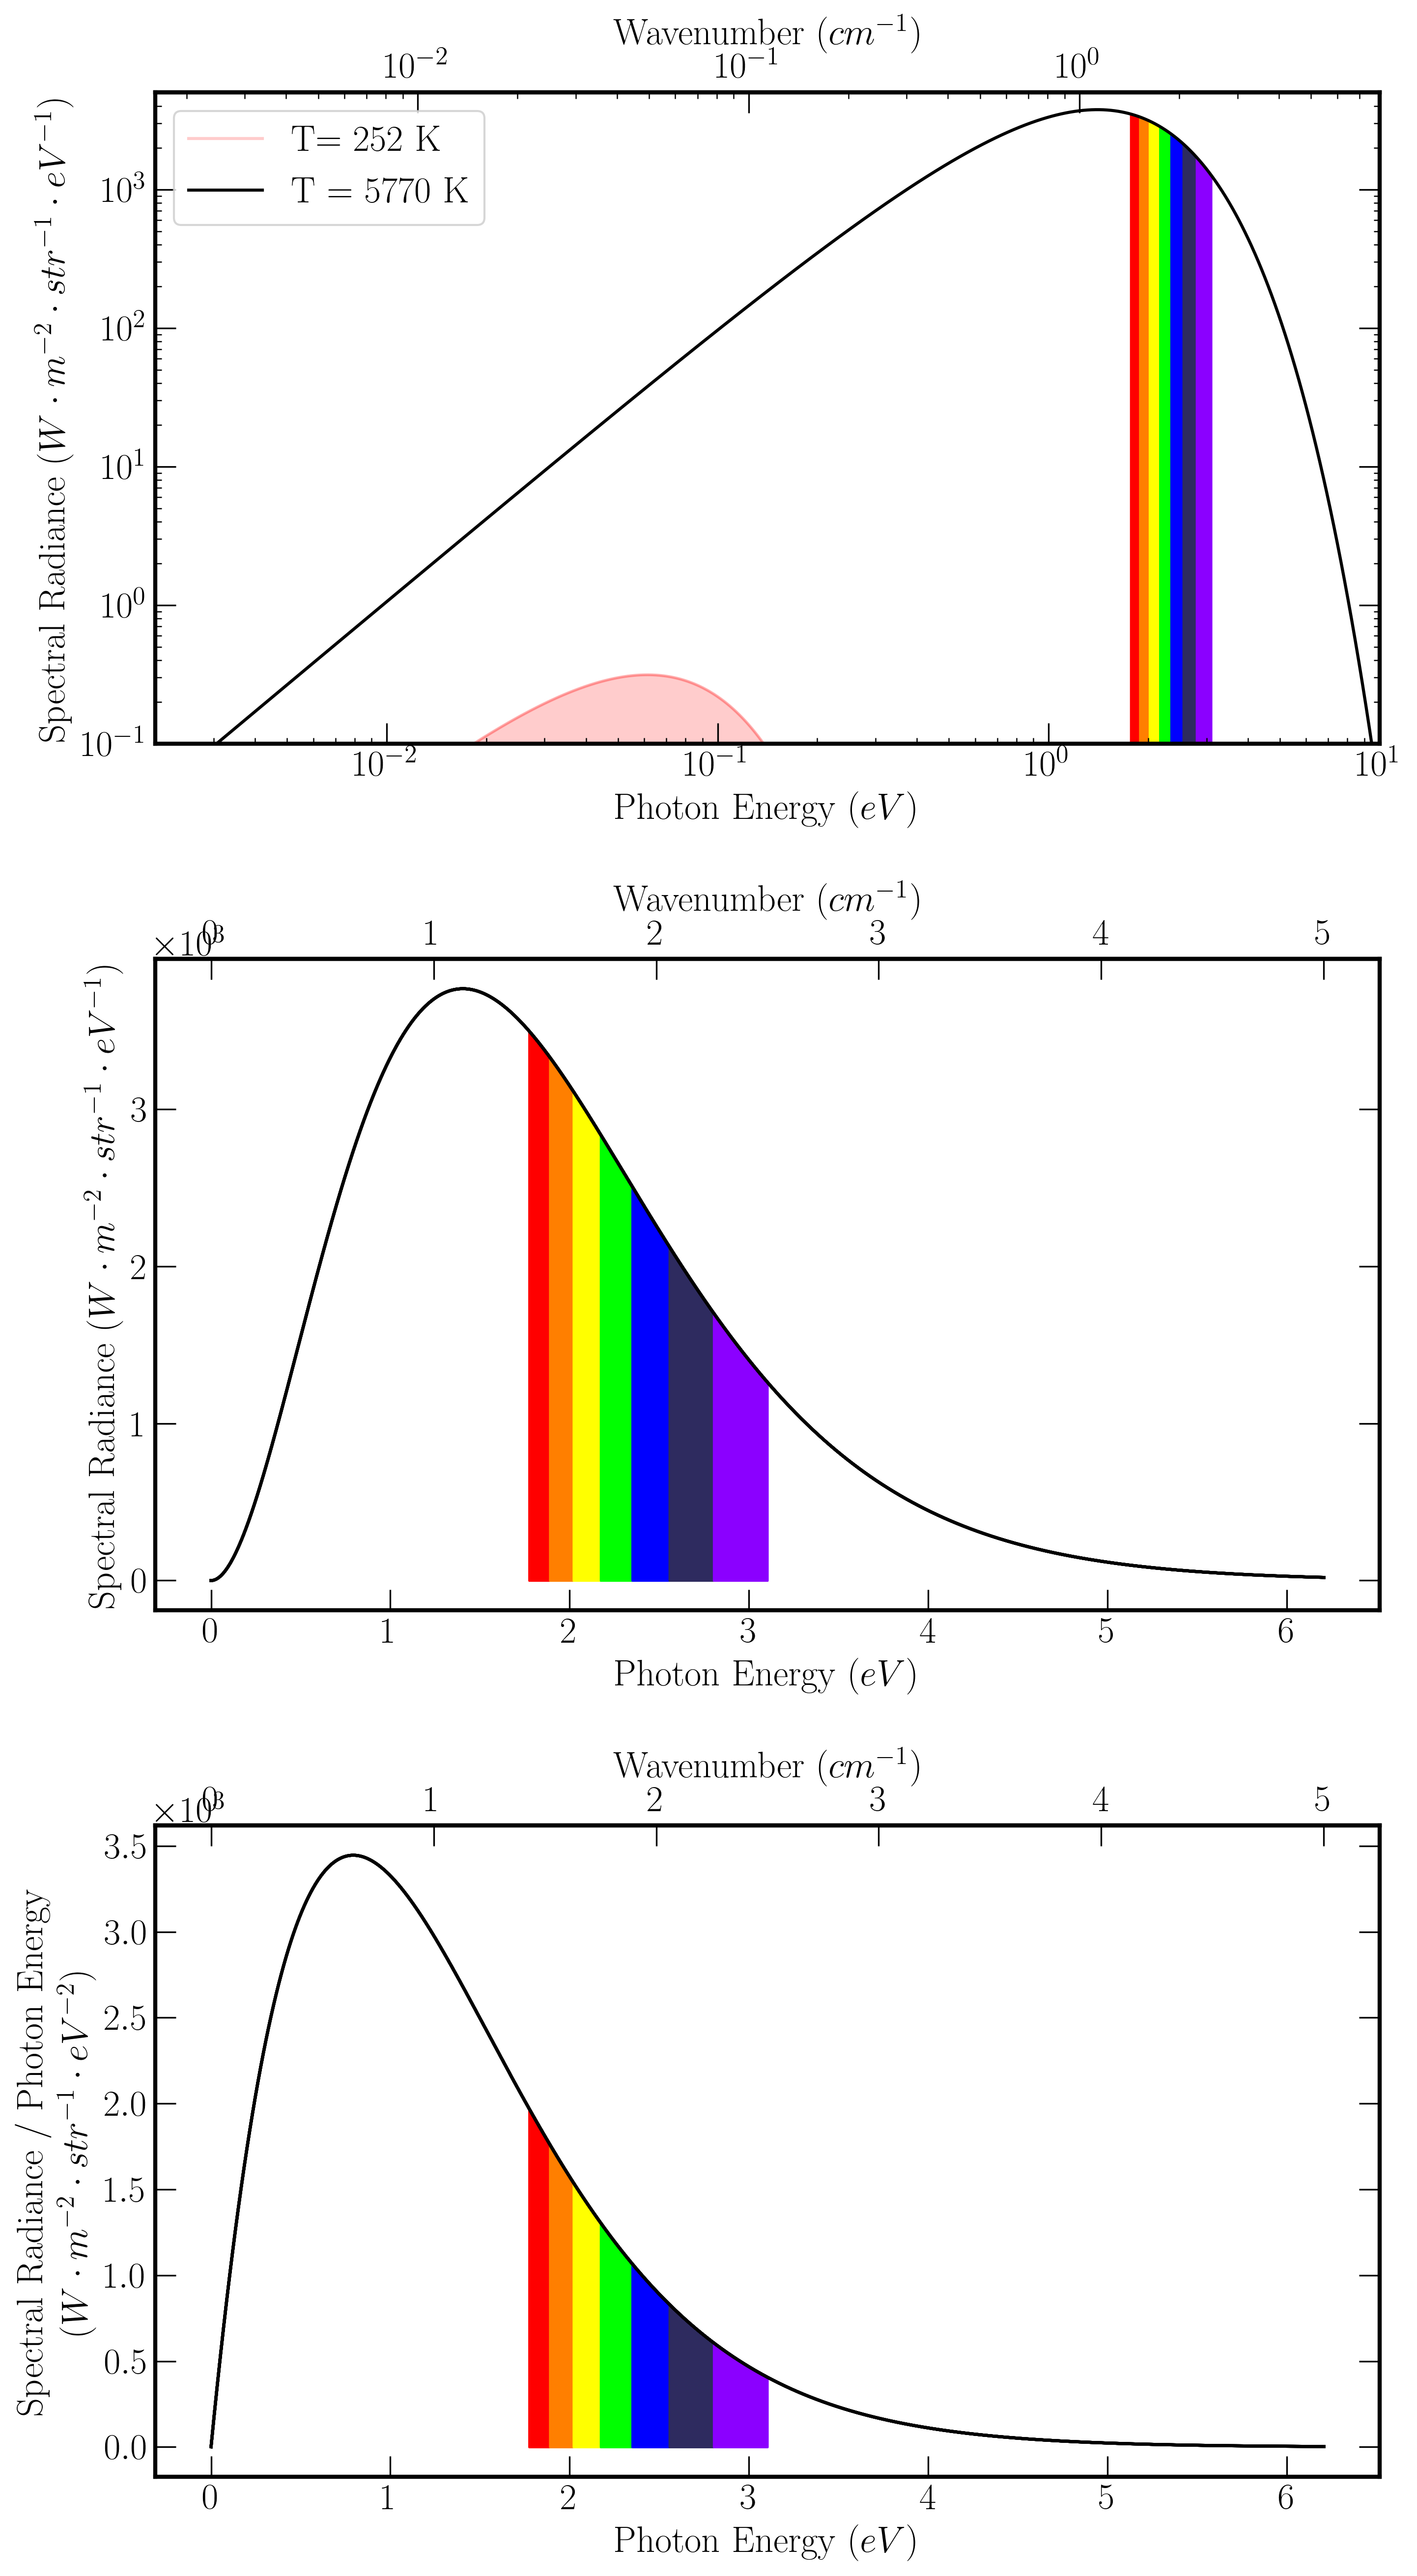

In [24]:
plt.rcParams["xtick.top"] = False
###Defining X axis for plots
plot_resolution = 100000  # um
nu_sun = np.linspace(0, 10, plot_resolution)
nu_to_E = cst.c * cst.h * 10**6 / (1.6 * 10**-19)
E_sun = nu_sun * nu_to_E
max_E_index = int(plot_resolution / 2)
lambda_sun = np.linspace(0, 3, plot_resolution)
###Defining Y axis for plots
I_inc = plank_nu(
    nu_sun,
    5770,
    flux=False,
    units="um",
)
I_out = plank_nu(
    nu_sun,
    252,
    flux=False,
    units="um",
)
I_inc_lambda = plank(lambda_sun, 5770, units="um")
I_inc_E = I_inc * nu_to_E
I_out_E = I_out * nu_to_E

###Rainbow Colour
rgb_tup = [
    [1, 0, 0],
    [1, 127 / 255, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [46 / 255, 43 / 255, 95 / 255],
    [139 / 255, 0, 1],
]
rainbow_nu = 1 / np.linspace(0.7, 0.4, 8)
rainbow_E = rainbow_nu * 1.24
###Plotting
fig, ax = plt.subplots(3, 1, figsize=(10, 18))
ax[0].loglog(
    E_sun, I_out_E, linestyle="-", label="T= 252 K", color=[1, 0, 0, 0.2]
)  ##Sun
ax[0].loglog(E_sun, I_inc_E, c=[0, 0, 0], label="T = 5770 K")  ##Earth
ax[0].fill_between(E_sun, I_out_E, color=[1, 0, 0, 0.2])
Y = [I_inc_E, I_inc_E, I_inc_E / E_sun]
for plot in range(3):  ###Rainbow
    for i in range(7):
        start = np.where(nu_sun > rainbow_nu[i])[0][0]
        stop = np.where(nu_sun > rainbow_nu[i + 1])[0][0]
        ax[plot].fill_between(
            E_sun[start:stop], Y[plot][start:stop], color=rgb_tup[i]
        )
        if plot != 0:
            ax[plot].plot(
                E_sun[:max_E_index], Y[plot][:max_E_index], c="black"
            )
    sec = ax[plot].secondary_xaxis(
        "top", functions=(lambda x: x / nu_to_E, lambda x: x / nu_to_E)
    )
    sec.set_xlabel("Wavenumber $(cm^{-1})$")
ax[0].set_xlim(0.002, 10)
ax[0].set_ylim(0.1, 5 * 10**3)
ax[0].legend()
ax[0].set_ylabel(
    r"Spectral Radiance $(W\cdot m^{-2} \cdot str^{-1} \cdot eV^{-1})$"
)
ax[1].set_ylabel(
    r"Spectral Radiance $(W\cdot m^{-2} \cdot str^{-1} \cdot eV^{-1})$"
)
ax[2].set_ylabel(
    r"Spectral Radiance / Photon Energy "
    "\n"
    r"$(W\cdot m^{-2} \cdot str^{-1} \cdot eV^{-2})$"
)
ax[0].set_xlabel("Photon Energy $(eV)$")
ax[2].set_xlabel("Photon Energy $(eV)$")
ax[1].set_xlabel("Photon Energy $(eV)$")
ax[1].ticklabel_format(axis="Y", style="sci", scilimits=(3, 3))
ax[2].ticklabel_format(axis="Y", style="sci", scilimits=(3, 3));

Further a plot of spectral radiance is shown against wavenumber, this can often be a misleading quantity when thinking about photon energy, because of the non-linear conversion, one might assume that the majority of the energy arriving from the sun is in the visible range however this is not the case as seen above.

Text(0, 0.5, 'Spectral Radiance $(W\\cdot m^{-2} \\cdot \\mu m^{-1})$')

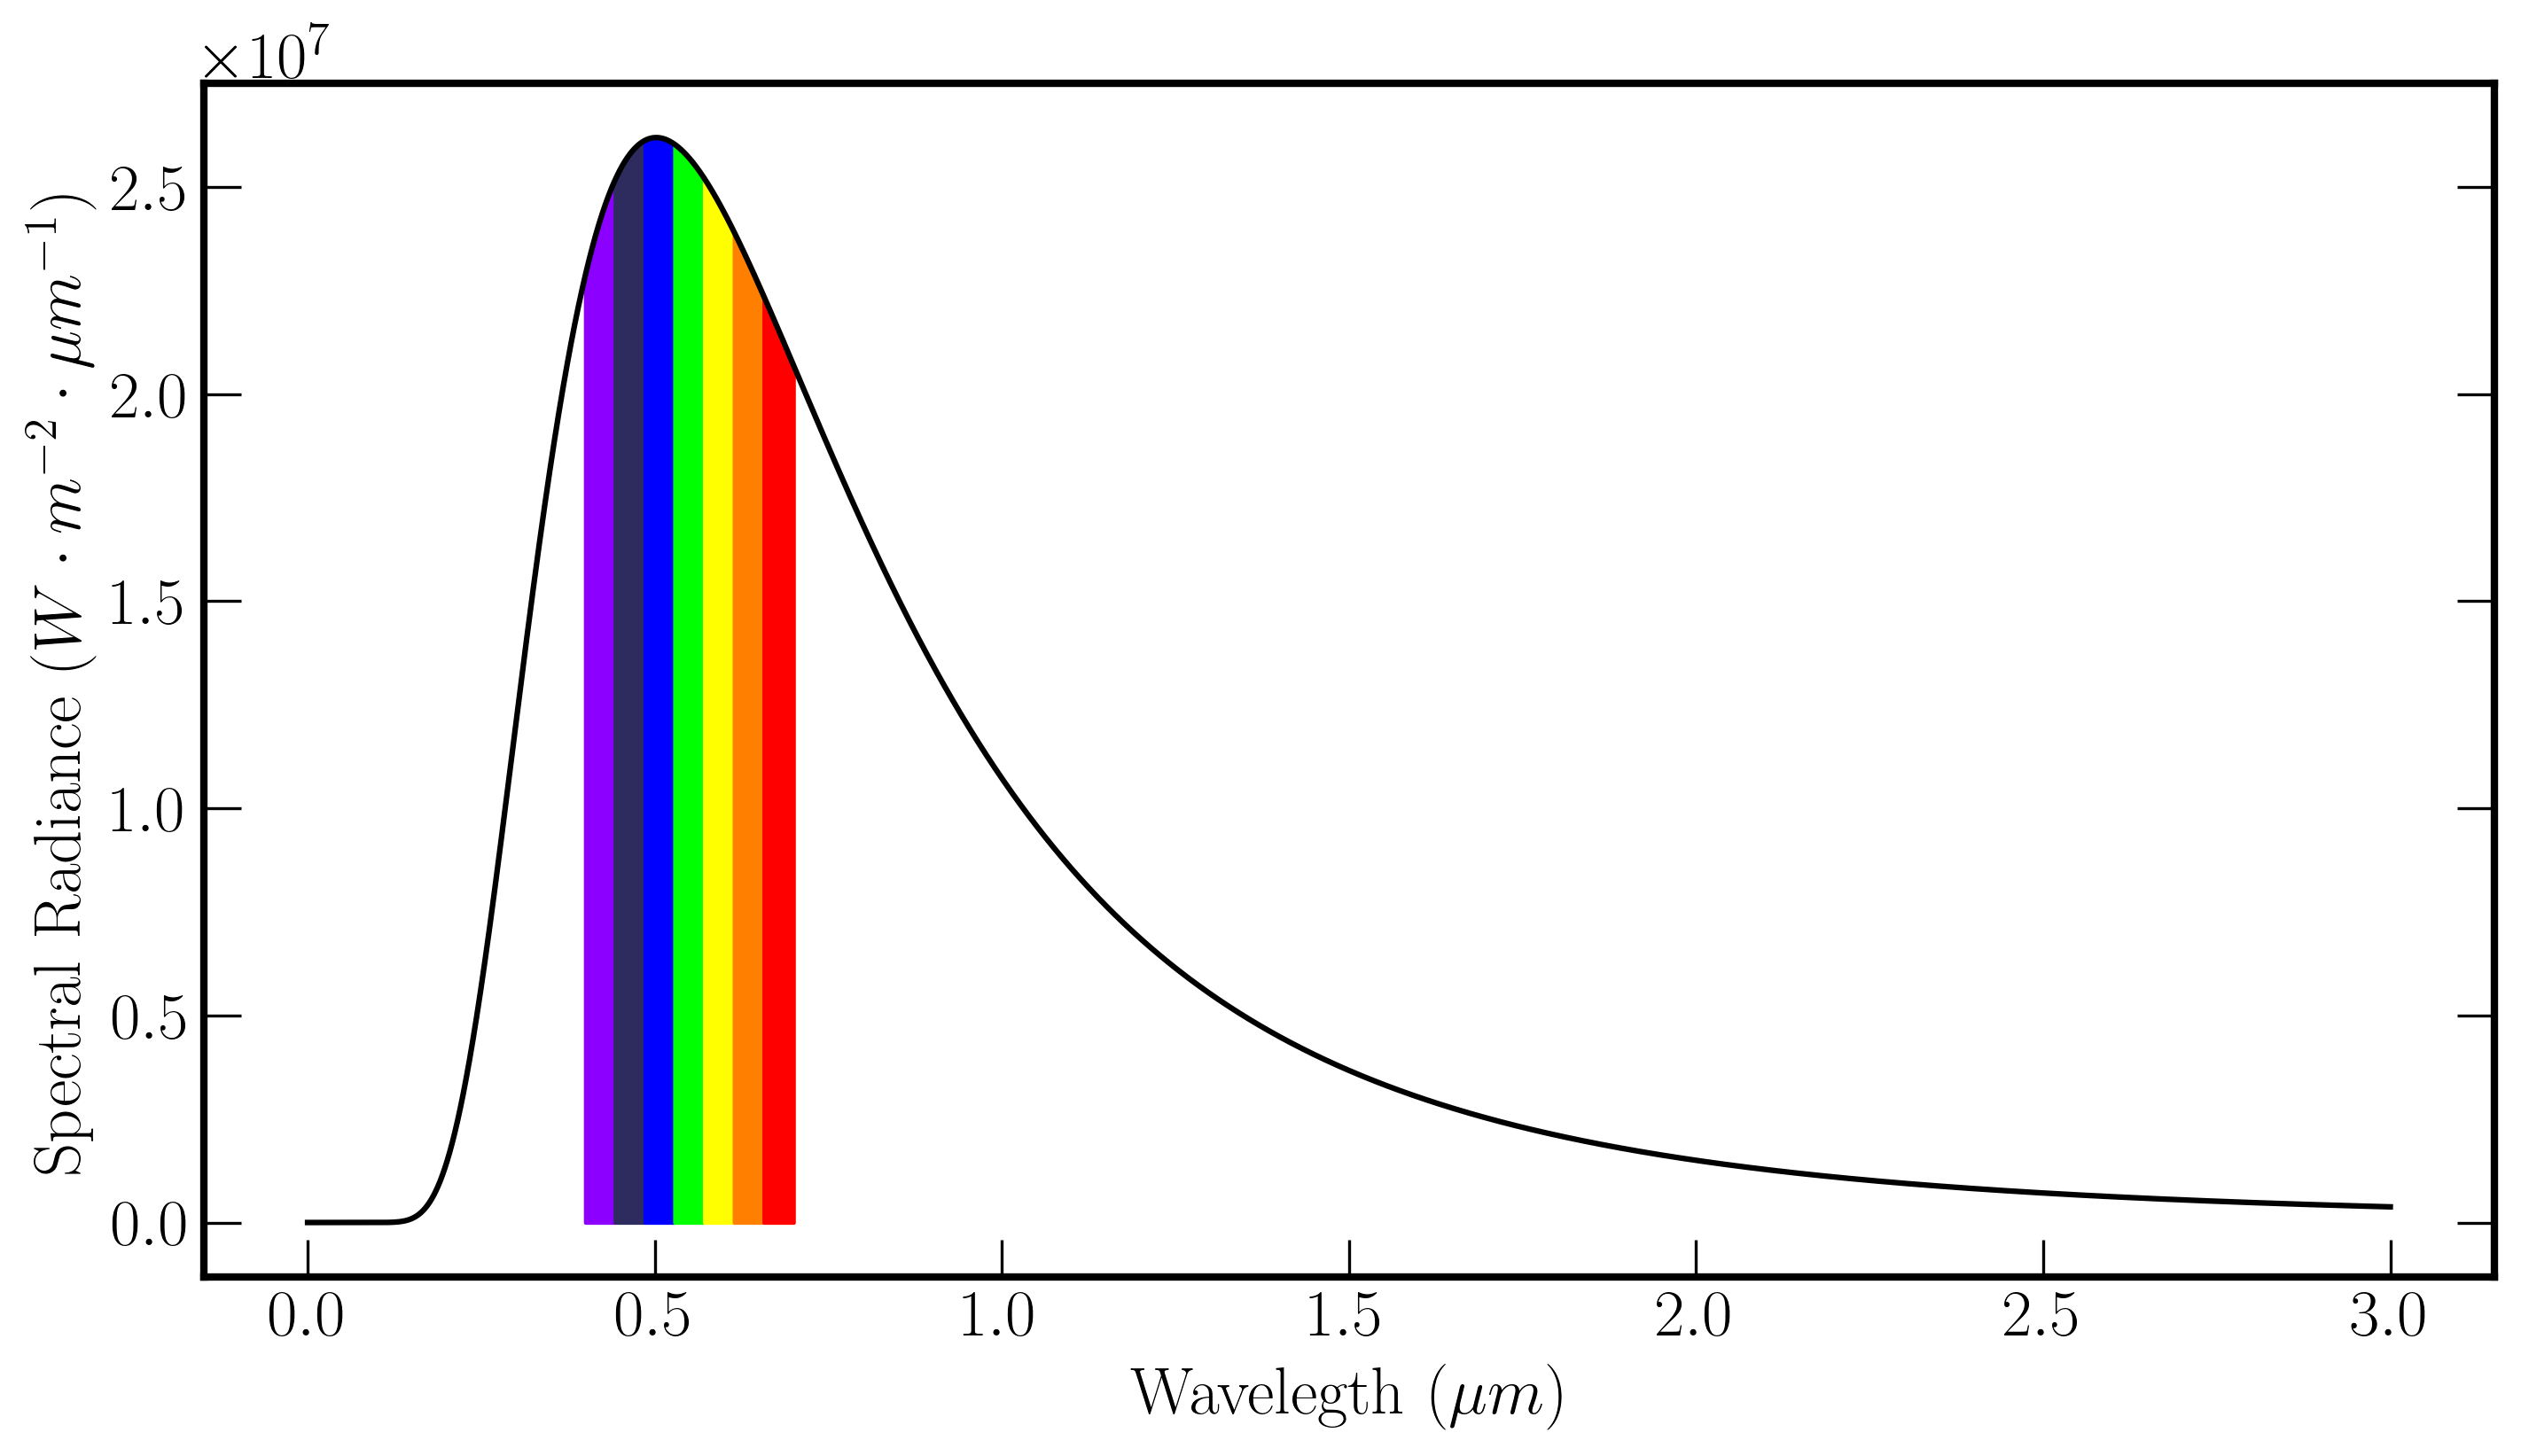

In [26]:
fig1,axs = plt.subplots()
axs.plot(lambda_sun,I_inc_lambda,c = "black")
rainbow_lambda = np.linspace(0.4,0.7,8)
for i in range(7):
    start = np.where(lambda_sun > rainbow_lambda[i])[0][0]
    stop = np.where(lambda_sun > rainbow_lambda[i+1])[0][0]
    axs.fill_between(lambda_sun[start:stop],I_inc_lambda[start:stop],color =rgb_tup[7-(i+1)] )
###Labels
axs.set_xlabel("Wavelegth $(\mu m$)")
axs.set_ylabel(r'Spectral Radiance $(W\cdot m^{-2} \cdot \mu m^{-1})$')


Inspection of the two linear spectral radiance plots, shows that there is a discrepancy between the peak values, of the graphs. With the peaks being associated to different energy photons, $B_{max}(\lambda_{max},5770); 1E_{\lambda max} = 2.47 eV$  $B_{max}(\nu,5770); E_{\nu max} = 1.4 eV$. When the function is a distribution and the transformation between independent variables is non-linear, one must be careful about the conclusions one draws. To transform between the functions the product rule can be used
\begin{equation}
B(\nu,T)d \nu = B(\lambda,T)\frac{d \lambda}{d\nu} d \lambda,
\end{equation}
\begin{equation}
\frac{d \lambda}{d\nu} = - \lambda^2.
\end{equation}
This adds to a common misconception that the photons arriving from the Sun is peaked in green wavelengths, this is where the spectral peak is. A can be seen in the third figure from the top, where the Y axis is proportional to the number of photons per second at a given wavenumber, this is peaked in the infrared. As an aside, The colour of the sun is white, because the relative magnitudes across the visible spectrum are close to zero.

## Radiation Balance
The first idea for a radiation model, is to treat the earth as if it lacked an atmosphere and was just a colourful rock. The concept of albedo is briefly introduces this is $1 - \textrm{emissivity}$, and takes into account the fact that earth is quite reflective and white.

An approximate temperature for the Earths surface can be determined using the stefan-Boltzmann Law, equating the total power in to the total power out.
\begin{equation}
 F = 4 \sigma T^4 = \pi \int^\infty _0 d \nu B_{\nu}(\nu, T)
\end{equation}
The Earth is not matte black it has an alebdo value which is mostly due to the clouds. This has an average value of 0.3
 - Ratio of Flux arriving at earth:
    - Radius of The Sun $R_{Sun} = 696340km$
    - Distance of Earth From Sun  $D_{es}= 151.56\cdot 10^6km$
    - $ R = \frac{R_{Sun}^2}{D_{es}^2}$
- Total Incident flux from Sun:
   - $ F_{incident} = \pi \int_0^\infty d\nu(B(\nu,5770k))\cdot R $
- Total Flux Incident:
   - Albedo of Earth is $\approx 0.3$
   - $F_{absorbed} = (1-A)*F_{incident}$
- Temperature of Earth
   - $T_{Earth} = (\frac{F_{absorbed}}{4 \sigma})^{\frac{1}{4}}$

In [29]:
R_Earth = 6371*10**3
R_Sun = 696340*10**3
D_Earth_Sun = 1.5154*10**11
Flat_Earth_Surface_Area = np.pi*R_Earth**2
sigma = 5.67*10**-8
T_sun = 5770
Albedo = 0.3
Flux_to_Earth = sigma*T_sun**4*(R_Sun/D_Earth_Sun)**2
Power_to_earth = Flat_Earth_Surface_Area*Flux_to_Earth*(1-Albedo)
T_Earth = (Power_to_earth/Flat_Earth_Surface_Area/(4*sigma))**0.25
print(f"Temperature of Earth in Kelvin: {T_Earth:.3}")

Temperature of Earth in Kelvin: 2.53e+02


Our assumptions give us a temperature of $\approx -$20^\circ C$, which is clearly much colder than the Earth's measured mean temperature of $14^\circ C$. This leads us to the greenhouse effect, where, short wave radiation absorbed by the earth ,from the sun, is re emitted as long wave radiation from the Earth. It is re absorbed by gases in the atmosphere and 'trapped'. Thus total Flux from the earth is Lower than that predicted.


